In [5]:
import random
import sage.graphs.graph_plot
from sage.graphs.base.boost_graph import *
from sage.plot.point import *
import numpy

In [6]:
def seznam_cen(st_opazanj, st_pov_grafa, min_cena, max_cena):
    sur_podatki = []
    for i in range(0, st_opazanj):
        mer_povezav = []
        for j in range(0, st_pov_grafa):
            mer_povezav.append(numpy.random.random_integers(min_cena, max_cena))
        sur_podatki.append(mer_povezav)
    return(sur_podatki)

#stevilo_pov_grafa = 2 * st_vozlisc^2 - 2 * st_vozlisc

In [7]:
def mnoz(vektor1, vektor2):
    matrika = []
    for i in range(0,len(vektor1)):
        vrstica =[]
        for j in range(0, len(vektor2)):
            vrstica.append(vektor1[i] * vektor2[j])
        matrika.append(vrstica)
    return(matrika)

def kov_matrika(vse_utezi):
    avr_pov = [i * 1/len(vse_utezi) for i in [sum(x) for x in zip(*vse_utezi)]]
    #zac_mat = numpy.matrix(mnoz(numpy.subtract(vse_utezi[0],avr_pov),numpy.subtract(vse_utezi[0],avr_pov)))
    zac_mat = mnoz(numpy.subtract(vse_utezi[0],avr_pov),numpy.subtract(vse_utezi[0],avr_pov))
    for i in range(1, len(vse_utezi)):
        #zac_mat += numpy.matrix(mnoz(numpy.subtract(vse_utezi[i],avr_pov),numpy.subtract(vse_utezi[i],avr_pov)))
        zac_mat = numpy.add(zac_mat, mnoz(numpy.subtract(vse_utezi[i],avr_pov),numpy.subtract(vse_utezi[i],avr_pov)))
    kon_mat = numpy.dot(1/len(vse_utezi), zac_mat)
    return(kon_mat)



In [6]:
def nakljucno_vozlisce(st_vozlisc1):
    start = random.randint(0, st_vozlisc1)
    end = random.randint(0,st_vozlisc1)
    if start == end:
        return nakljucno_vozlisce(st_vozlisc1)
    else:
        return[start, end]

def vsa_vozlisca(koliko, st_pov1):
    vozlisca = []
    for i in range(0, st_pov1):
        x = nakljucno_vozlisce(koliko)
        while x in vozlisca:
            x = nakljucno_vozlisce(koliko)
        vozlisca.append(x)
    return vozlisca

In [15]:
def vektorcki_x(graf, zacetno, koncno):
    vse_poti = graf.all_paths(zacetno, koncno, use_multiedges=True, report_edges=False, labels=False)
    vse_povezave = graf.edges()
    par = []
    for i in range(0,len(vse_povezave)):
        par.append(vse_povezave[i][0:2])
    seznam_vektorjev = []
    for i in range(0, len(vse_poti)):
        pot = (vse_poti[i])
        prvi_oklepaj1 = list(zip(pot, pot[1:] + pot[:1]))
        prvi_oklepaj = prvi_oklepaj1[:-1]
        x=[]
        for i in range(0, len(par)):
            if par[i] in prvi_oklepaj:
                x.append(1)
            else:
                x.append(0)
        seznam_vektorjev.append(x)
    return(seznam_vektorjev)

In [4]:
def grid_graf(st_opazanj, st_vozlisc, min_cena, max_cena):
    st_pov_grafa = 2 * st_vozlisc^2 - 2 * st_vozlisc
    utezi = seznam_cen(st_opazanj, st_pov_grafa, min_cena, max_cena)
    #graf_seznam = vsa_vozlisca(st_vozlisc, st_pov_grafa)
    graf_seznam = graphs.Grid2dGraph(st_vozlisc, st_vozlisc).edges()
    nov = [] #najprej spremeniva v list
    for i in range(0,len(graf_seznam)):
        nov.append(list(graf_seznam[i]))
    konec = [] #dodava še ceno, v obliki ki jo sprjema digraph
    seznam_grafov = []
    for j in range(0,len(utezi)):
        zadnji = []
        for i in range(0,len(nov)):
            vmesni = []
            vmesni.append(nov[i][0])
            vmesni.append(nov[i][1])
            vmesni.append(utezi[j][i])
            zadnji.append(tuple(vmesni))
        konec.append(zadnji)
        gr = DiGraph(zadnji)
        seznam_grafov.append(gr)
    #seznam_gra[0].show(edge_labels = True)
    return(seznam_grafov, utezi)

In [14]:
uer = []
def razisci(x0, x1, pov, diag, poti):
    alfa_m = numpy.dot(diag,numpy.subtract(x1,x0)) / numpy.dot(numpy.subtract(pov,diag),numpy.subtract(x0,x1))
    v_alfa = numpy.dot(alfa_m, pov)
    v_1alfa = numpy.dot((1-alfa_m), diag)
    vek_zv = numpy.add(v_alfa, v_1alfa)
    x_zv = argmin(poti, v_alfa, v_1alfa)[0]
    #x_zv = argmin(poti, numpy.dot(alfa_m, pov), numpy.dot((1-alfa_m), diag))
    prvi_vektor =  numpy.dot(vek_zv, x_zv)
    drugi_vektor = numpy.dot(vek_zv, x0)
    if prvi_vektor < drugi_vektor:
        if drugi_vektor - prvi_vektor > 0.01:
            print("Najdeno je bilo izboljšanje.")
    #if x_zv[3] < argmin([x0], numpy.dot(alfa_m, pov), numpy.dot((1-alfa_m), diag))[3]:
            uer.append(x_zv)
            razisci(x0, x_zv, pov, diag, poti)
            razisci(x_zv, x1, pov, diag, poti)
        else:
            print("Razlika je minimalna.")
    else:
        print("ne najdemo izboljsanja")
        #uer.append(argmin([x0, x1], pov, diag)[0])
    return(uer)

#def naivni_alg (x0, x1, pov, diag, poti):
#    #uer =[]
#    razisci(x0, x1, pov, diag, poti)
#    return(uer)

razisci(xln, xrn, povprecje_w, diagonalci, xi)

NameError: name 'xln' is not defined

In [16]:
[grafi, weights] = grid_graf(3, 7, 1, 100)
g = grafi[0]
#g.show(edge_labels = True)
povprecje_w = [i * 1/len(weights) for i in [sum(x) for x in zip(*weights)]]
print(povprecje_w)
#print(kov_matrika(weights))
diagonalci = numpy.diag(kov_matrika(weights))
print(diagonalci)
xi = vektorcki_x(g, (0, 0), (6, 6))
#print(weights)
print(xi)
print(len(xi))

[60.333333333333336, 55.666666666666664, 37.666666666666664, 56.333333333333336, 37.0, 73.33333333333333, 84.0, 60.333333333333336, 56.666666666666664, 65.0, 38.0, 35.0, 50.333333333333336, 31.333333333333332, 61.333333333333336, 41.666666666666664, 32.666666666666664, 45.666666666666664, 45.666666666666664, 61.333333333333336, 46.0, 51.666666666666664, 56.333333333333336, 54.333333333333336, 38.333333333333336, 53.333333333333336, 50.0, 27.0, 72.66666666666667, 65.66666666666667, 30.333333333333332, 58.666666666666664, 60.333333333333336, 59.333333333333336, 80.33333333333333, 64.33333333333333, 60.0, 44.666666666666664, 46.333333333333336, 38.333333333333336, 69.0, 81.33333333333333, 21.666666666666668, 42.0, 95.66666666666667, 68.66666666666667, 66.33333333333333, 65.0, 39.0, 33.333333333333336, 46.333333333333336, 61.0, 59.666666666666664, 83.0, 60.666666666666664, 54.333333333333336, 73.66666666666667, 74.66666666666667, 66.0, 51.666666666666664, 45.333333333333336, 14.33333333333

<ipython-input-6-1f0f1f17ca7f>:6: DeprecationWarning: This function is deprecated. Please call randint(1, 100 + 1) instead
  mer_povezav.append(numpy.random.random_integers(min_cena, max_cena))


In [12]:
def arglexmin(seznam_x, vektorji):
    xmin = min(([numpy.dot(numpy.array(v), numpy.array(x)) for v in vektorji], x) for x in seznam_x)
    return xmin

xl = arglexmin(xi, [povprecje_w, diagonalci])
xln = xl[1]
print(xl)
#print(xln)
xr = arglexmin(xi, [diagonalci, povprecje_w])
xrn = xr[1]
print(xr)
#print(xrn)
#print(numpy.dot(diagonalci,numpy.subtract(xrn,xln)) / numpy.dot(numpy.subtract(povprecje_w,diagonalci),numpy.subtract(xln,xrn)))

NameError: name 'xi' is not defined

In [10]:
def argmin(poti, av_pov, diagonala):
    x_min = poti[0]
    cena_pov = numpy.dot(av_pov, x_min)
    cena_d = numpy.dot(diagonala, x_min)
    cena = cena_pov + cena_d
    #cena = numpy.dot(numpy.add(av_pov, diagonala), poti[0])
    #if len(poti) == 1:
    #    return(x_min, cena_pov, cena_d, cena)
    #else:
    for i in range(1, len(poti)):
        x_nov = poti[i]
        cena_pov_nov = numpy.dot(av_pov, x_nov)
        cena_d_nov = numpy.dot(diagonala, x_nov)
        cena_nov = cena_pov_nov + cena_d_nov
        #cena_nov = numpy.dot(numpy.add(av_pov,diagonala), poti[i])
        if cena_nov < cena:
            x_min = x_nov
            cena_pov = cena_pov_nov
            cena_d = cena_d_nov
            cena = cena_nov
    return(x_min, cena_pov, cena_d, cena)

#min_x = argmin([xrn], povprecje_w, diagonalci)[3]
#print(min_x)
#print(price)

In [32]:
import sys
sys.setrecursionlimit(10000)
print(sys.getrecursionlimit())

10000


In [0]:
#uer = []
#razisci(x0, x1, pov, diag, poti)
#[xek, alfica, uer] = razisci(xln, xrn, povprecje_w, diagonalci, xi)
#u_eks_r = naivni_alg(xln, xrn, povprecje_w, diagonalci, xi)
#print(u_eks_r)
#print(xek)
#print(alfica)
#print(uer[0])
#super_x = argmin([xln, xrn, xek], povprecje_w, diagonalci)[0]
#print(super_x)

In [39]:
#OBJ in x_rob

def argmin_kor(poti, av_pov, diagonala):
    x_rob = poti[0]
    cena_av = numpy.dot(x_rob, av_pov)
    cena_d = sqrt(numpy.dot(x_rob, diagonala))
    cena = cena_av + cena_d
    for i in range(1, len(poti)):
        x_nov = poti[i]
        cena_av_nov = numpy.dot(poti[i], av_pov)
        cena_d_nov = sqrt(numpy.dot(poti[i], diagonala))
        cena_nov = cena_av_nov + cena_d_nov
        if cena_nov < cena:
            x_rob = x_nov
            cena = cena_nov
    return(x_rob, cena)

[x_rob, OBJ1] = argmin_kor([xln, xrn], povprecje_w, diagonalci)
print(x_rob)
print(OBJ1)
print(numpy.dot(numpy.add(diagonalci, povprecje_w), x_rob))

[1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
316.4549859037063
2980.9999999999995


([264.3333333333333, 2716.6666666666665], [264.3333333333333, 2186.222222222222], [315.6666666666667, 2186.222222222222], 264.3333333333333, 269.69793058344237)


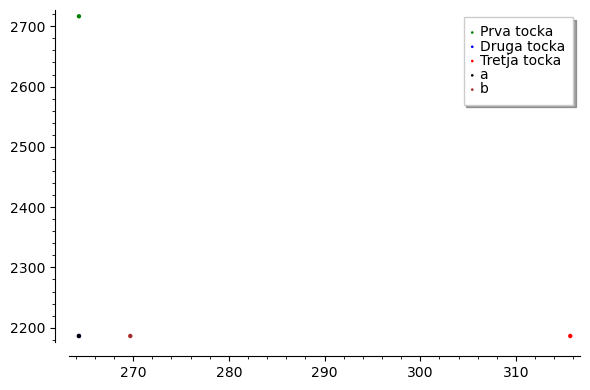

In [40]:
def tocke(utezi):
    d = numpy.diag(kov_matrika(utezi))
    avr_pov = [i * 1/len(utezi) for i in [sum(x) for x in zip(*utezi)]]
    xl = arglexmin(xi, [povprecje_w, diagonalci])
    xr = arglexmin(xi, [diagonalci, povprecje_w])
    xr_obrnjen = [xr[0][1], xr[0][0]]
    prva_tocka = xl[0]
    tretja_tocka = xr_obrnjen
    druga_tocka = [prva_tocka[0], tretja_tocka[1]]
    a = druga_tocka[0]
    b = OBJ1 - sqrt(druga_tocka[1])
    return(prva_tocka, druga_tocka, tretja_tocka, a, b)
    
#da nam vrne a in b
tocke = tocke(weights)
print(tocke)
a = tocke[3]
b = tocke[4]
#print(a)
#print(b)
#print(tocke[2])

#da nam nariše spodnji graf
G = Graphics()
G += points(tocke[0], legend_label = 'Prva tocka', color = 'green')
G += points(tocke[1], legend_label = 'Druga tocka', color = 'blue')
G += points(tocke[2], legend_label = 'Tretja tocka', color = 'red')
G += points([(tocke[3], tocke[1][1])], legend_label = 'a', color = 'black')
G += points([(tocke[4], tocke[2][1])], legend_label = 'b', color = 'brown')
G.show()

[267.01563195838787, 2444.249718530473]
[264.3333333333333, 2716.6666666666665]
[264.3333333333333, 2186.222222222222]
[315.6666666666667, 2186.222222222222]


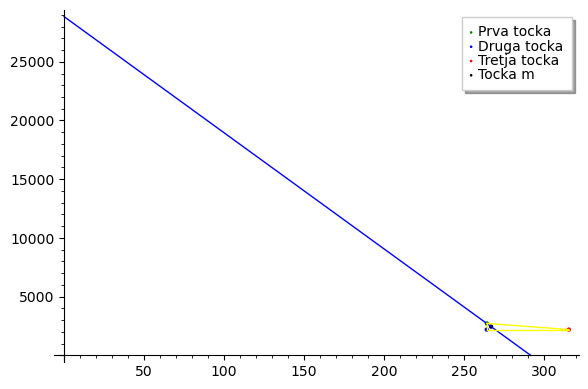

In [41]:
#poračunamo še m
m = (a + b)/2

#poračunamo naklon premice v grafu c
naklon = 2*(m-OBJ1)

#premica gre skozi točko (m, (OBJ-m)**2)

tocka_m = [m, (OBJ1-m)**2]
print(tocka_m)
print(tocke[0])
print(tocke[1])
print(tocke[2])

#če ustavimo točko_m in naklon v formulo za premico dobimo začetno točko n:
n = (OBJ1-m)^2 -naklon*m

#ravna premica v grafu c in gre skozi točko, to je
#premica = naklon * x - n

#narišem to premico
G = Graphics()
G += points(tocke[0], legend_label = 'Prva tocka', color = 'green')
G += points(tocke[1], legend_label = 'Druga tocka', color = 'blue')
G += points(tocke[2], legend_label = 'Tretja tocka', color = 'red')
G += points(tocka_m, legend_label = 'Tocka m', color = 'black')
G += line([(0,n),(-(n/naklon) ,0)])
G += line([(tocke[0]),(tocke[1])], color = 'yellow')
G += line([(tocke[0]),(tocke[2])], color = 'yellow')
G += line([(tocke[1]),(tocke[2])], color = 'yellow')
G.show()


In [42]:
#definiramo še alfo_m
alfa_m = (2*(m-OBJ1))/(2*(m-OBJ1) - 1)
print(alfa_m)

#skonstruiramo x_new

[x_new, pov_x_new, diag_x_new, cena_x_new] = argmin(xi, numpy.dot(povprecje_w, alfa_m), numpy.dot((1-alfa_m), diagonalci))
print(x_new)
print(pov_x_new)
print(diag_x_new)
print(cena_x_new)
#OBJ2 = OBJ1
OBJ2 = numpy.dot(numpy.add(numpy.dot(povprecje_w, alfa_m), sqrt(numpy.dot((1-alfa_m), diagonalci))), x_new)
print(OBJ1)
print(OBJ2)

0.989987856059422
[1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
261.6867899517072
27.19965770523699
288.8864476569442
316.4549859037063
273.4991757169865


In [43]:
#naredimo manjše trikotnike
prva_tocka = tocke[0]
tretja_tocka = tocke[2]
tocka_m = [m, (OBJ1-m)**2]
print(prva_tocka)
print(tretja_tocka)

x_koord_spod_tocke = (tretja_tocka[1] - n)/naklon
spodnja_tocka = [x_koord_spod_tocke, tretja_tocka[1]]
print(spodnja_tocka)

y_koord_zg_tocke = naklon * prva_tocka[0] + n
zgornja_tocka = [prva_tocka[0], y_koord_zg_tocke]
print(zgornja_tocka)

#presečišče premice in krivulje, da dobimo nove intervalčke
var('z')
sol = solve(0 == z^2 -(2*OBJ1 + naklon)*z +(OBJ1^2-n), z)
nsol = [N(s.rhs()) for s in sol]
print(nsol)

siva_zgoraj = [nsol[0], (OBJ1-nsol[0])^2]
print(siva_zgoraj)
siva_spodaj = [nsol[1], (OBJ1-nsol[1])^2]
print(siva_spodaj)
print(tocka_m)

#nova dva m
m1 = (siva_zgoraj[0] + prva_tocka[0]) / 2
print(m1)
m2 = (tretja_tocka[0] + siva_spodaj[0]) / 2
print(m2)

tocka_m1 = [m1, (OBJ1-m1)^2]
tocka_m2 = [m2, (OBJ1-m2)^2]


#definiramo še nove alfo_m
if tocka_m2[1] < tretja_tocka[1]:
    print("Ne računaj alfa_m2.")
else:
    print("Računaj alfa_m2.")
    
if tocka_m1[1] < tretja_tocka[1]:
    print("Ne računaj alfa_m1.")
else:
    print("Računaj alfa_m1.")
    
    
alfa_m1 = (2*(m1-OBJ1))/(2*(m1-OBJ1) - 1)
alfa_m2 = (2*(m2-OBJ1))/(2*(m2-OBJ1) - 1)
print(alfa_m1)
print(alfa_m2)

#skonstruiramo x_new

[x_new1, pov_x_new1, diag_x_new1, cena_x_new1] = argmin(xi, numpy.dot(povprecje_w, alfa_m1), numpy.dot((1-alfa_m1), diagonalci))
print(x_new1)
print(pov_x_new1)
print(diag_x_new1)
print(cena_x_new1)


[x_new2, pov_x_new2, diag_x_new2, cena_x_new2] = argmin(xi, numpy.dot(povprecje_w, alfa_m2), numpy.dot((1-alfa_m2), diagonalci))
print(x_new2)
print(pov_x_new2)
print(diag_x_new2)
print(cena_x_new2)


G = Graphics()
G += points(prva_tocka, legend_label = 'Prva tocka', color = 'green')
G += points(tretja_tocka, legend_label = 'Tretja tocka', color = 'blue')
G += points(zgornja_tocka, legend_label = 'Zgornja', color = 'red')
G += points(spodnja_tocka, legend_label = 'Spodnja', color = 'yellow')
G += points(tocka_m, legend_label = 'Tocka m', color = 'black')
G += line([prva_tocka,zgornja_tocka], color = 'yellow')
G += line([zgornja_tocka, tocka_m], color = 'yellow')
G += line([tocka_m, prva_tocka], color = 'yellow')
G += line([tretja_tocka,spodnja_tocka], color = 'yellow')
G += line([spodnja_tocka, tocka_m], color = 'yellow')
G += line([tocka_m, tretja_tocka], color = 'yellow')
G += points(siva_zgoraj, legend_label = 'siva_zgoraj', color = 'blue')
G += points(siva_spodaj, legend_label = 'siva_spodaj', color = 'red')
G += points(tocka_m1, legend_label = 'tocka_m1', color = 'grey')
G += points(tocka_m2, legend_label = 'tocka_m2', color = 'grey')
G.show()

[264.3333333333333, 2716.6666666666665]
[315.6666666666667, 2186.222222222222]
[269.6251674368817, 2186.222222222222]
[264.3333333333333, 2709.4719407526973]
[267.015631958388 - 0.0000110986120569229*I, 267.015631958388 + 0.0000110986120569229*I]
[267.015631958388 - 0.0000110986120569229*I, (2444.249718530367+0.0010974164195679838j)]
[267.015631958388 + 0.0000110986120569229*I, (2444.249718530367-0.0010974164195679838j)]
[267.01563195838787, 2444.249718530473]
265.674482645861 - 5.54930602846145e-6*I
(291.3411493125272+5.5493060284614515e-06j)
Ne računaj alfa_m2.
Računaj alfa_m1.
0.990249705673013 + 1.05512550873304e-9*I
(0.9804793007786984-4.229211562388793e-09j)
[1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
(261.75600553289985+2.7890484280843337e-07j)
(26.488299588313886-2.866424298724756e-06j)
(288.24430512121376-2.587519455916323e-06j)
[1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
(259.1733618391693-1.1179215896581041e-06j)
(53.

IndexError: invalid index to scalar variable.

In [40]:
#premica = naklon * x - n
#OBJ2 = numpy.dot(numpy.add(diagonalci, povprecje_w), x_new)
#OBJ2 = numpy.dot(povprecje_w, x_new) + sqrt(numpy.dot(diagonalci, x_new))
#OBJ2 = numpy.dot(povprecje_w, x_new)
#print(OBJ2)
#
##0=x^2 -(2*OBJ2 + naklon)*x +(n2 +OBJ2)
#
#x = (2*(m-OBJ2)*pov_x_new - diag_x_new- n)/(2*(m-OBJ2) - naklon)
#print(x)
#
#m2 = (a + x)/2
#print(m2)
#naklon2 = 2*(m2-OBJ2)
#n2 = (OBJ2-m2)^2 -naklon2*m2
#tocka_m2 = [m2, (OBJ2-m2)**2]
#print(naklon2)
#print(n2)
#
#
#alfa_m_2 = (2*(m2-OBJ2))/(2*(m2-OBJ2) - 1)
#print(alfa_m_2)
#
#[x_new2, pov_x_new2, diag_x_new2, cena_x_new2] = argmin(xi, numpy.dot(povprecje_w, alfa_m_2), numpy.dot((1-alfa_m_2), diagonalci))
#print(x_new2)
#
#x3 = (2*(m-OBJ2)*pov_x_new - diag_x_new- n)/(2*(m-OBJ2) - naklon)
#
#G = Graphics()
#G += points(tocke[0], legend_label = 'Prva tocka', color = 'green')
#G += points(tocke[1], legend_label = 'Druga tocka', color = 'blue')
#G += points(tocke[2], legend_label = 'Tretja tocka', color = 'red')
#G += points(tocka_m2, legend_label = 'Tocka m', color = 'black')
#G += line([(0,n2),(-(n2/naklon2) ,0)])
#G += line([(tocke[0]),(tocke[1])], color = 'yellow')
#G += line([(tocke[0]),(tocke[2])], color = 'yellow')
#G += line([(tocke[1]),(tocke[2])], color = 'yellow')
#G.show()

In [57]:
#VIDALI
var('z')
sol = solve(0 == z^2 -(2*OBJ2 + naklon)*z +(OBJ2^2-n), z)
nsol = [N(s.rhs()) for s in sol]
print(nsol)

nsol[0].is_real()
nsol[1].is_real()

[101.666992285413, 258.847593289237]


True

In [24]:
def izboljsan_algoritem(utezi, xe):
    intervali = []
    d = numpy.diag(kov_matrika(utezi))
    average_c = [i * 1/len(utezi) for i in [sum(x) for x in zip(*utezi)]]
    xl = arglexmin(xi, [average_c, d])
    xr = arglexmin(xi, [d, average_c])
    xl_vekt = xl[1]
    xr_vekt = xr[1]
    prva_tocka = xl[0]
    tretja_tocka = [xr[0][1], xr[0][0]]
    druga_tocka = [prva_tocka[0], tretja_tocka[1]]
    [x_rob, OBJ] = argmin_kor([xl_vekt, xr_vekt], average_c, d)
    print(OBJ)
    #najprej naredimo prvi interval ter vmesno točko m
    a = prva_tocka[0]
    b = OBJ - sqrt(tretja_tocka[1])
    intervali.append([a,b])
    m = m_funk(a,b,OBJ)[0]
    alfa_m = alfa(m, OBJ)
    #naredimo nove trikotnike
    x_koord_spod_tocke = (tretja_tocka[1] - n)/naklon
    spodnja_tocka = [x_koord_spod_tocke, tretja_tocka[1]]
    y_koord_zg_tocke = naklon * prva_tocka[0] + n
    zgornja_tocka = [prva_tocka[0], y_koord_zg_tocke]
    tocka_m1 = [m1, (OBJ1-m1)^2]
    tocka_m2 = [m2, (OBJ1-m2)^2]
    #naredimo nov x in pogledamo če je boljši od starega ali ne
    [x_new, pov_x_new, diag_x_new, cena_x_new] = argmin(xi, numpy.dot(average_c, alfa_m), numpy.dot((1-alfa_m), d))
    if 2 * (m - OBJ) * numpy.dot(average_c, x_rob) - 2 * (m -OBJ) * pov_x_new + diag_x_new < sqrt(numpy.dot(d, x_rob)):
        print("izboljsanje", x_new)
        x = x_new

        for i
        izboljsan_algoritem(utezi, xe, a, tocka_m1)
        print(OBJ)
    else:
        print("ni izboljsanja")
        #x = x_rob
    return()
    
    #naklon = naklon(m, OBJ)
    #zac_vr = zac_vr(m, OBJ)
izboljsan_algoritem(weights, xi)

SyntaxError: invalid syntax (<ipython-input-24-1c785a58915d>, line 33)

In [74]:
def m_funk(a, b, OBJ):
    m1 = (a + b) / 2
    return(m1, [m1, (OBJ - m1)^2 ])

def alfa(m, OBJ):
    alfa = (2*(m-OBJ))/(2*(m-OBJ) - 1)
    return(alfa)

def naklon(m, OBJ):
    naklon = 2*(m-OBJ)
    return(naklon)

def zac_vr(m, OBJ):
    n = (OBJ-m)^2 -naklon*m
    returm(n)

#def intervalcki()
#x_koord_spod_tocke = (tretja_tocka[1] - n)/naklon
#spodnja_tocka = [x_koord_spod_tocke, tretja_tocka[1]]
#print(spodnja_tocka)
#
#y_koord_zg_tocke = naklon * prva_tocka[0] + n
#zgornja_tocka = [prva_tocka[0], y_koord_zg_tocke]
#print(zgornja_tocka)

In [78]:
a = prva_tocka[0]
b = OBJ1 - sqrt(tretja_tocka[1])

def izboljsan_algoritem(utezi, xe, zacetek_intervala, konec_intervala, prejsnji_interval_leva, prejsnji_interval_desna):
    podatki = []
    #to bo vedno isto
    d = numpy.diag(kov_matrika(utezi))
    average_c = [i * 1/len(utezi) for i in [sum(x) for x in zip(*utezi)]]
    xl = arglexmin(xi, [average_c, d])
    xr = arglexmin(xi, [d, average_c])
    xl_vekt = xl[1]
    xr_vekt = xr[1]
    prva_tocka = xl[0]
    tretja_tocka = [xr[0][1], xr[0][0]]
    druga_tocka = [prva_tocka[0], tretja_tocka[1]]
    [x_rob, OBJ] = argmin_kor([xl_vekt, xr_vekt], average_c, d)
    #najprej naredimo prvi interval ter vmesno točko m
    #od tu naprej funkcija začne spreminjat reči
    m = m_funk(zacetek_intervala,konec_intervala,OBJ)[0]
    alfa_m = alfa(m, OBJ)
    naklon = 2*(m-OBJ)
    n = (OBJ-m)^2 -naklon*m
    #naredimo nove trikotnike
    #x_koord_spod_tocke = (tretja_tocka[1] - n)/ naklon
    #spodnja_tocka = [x_koord_spod_tocke, tretja_tocka[1]]
    #y_koord_zg_tocke = naklon * prva_tocka[0] + n
    #zgornja_tocka = [prva_tocka[0], y_koord_zg_tocke]
    var('z')
    sol = solve(0 == z^2 -(2*OBJ + naklon)*z +(OBJ^2-n), z)
    nsol = [N(s.rhs()) for s in sol]
    if nsol[0].is_real() == False or nsol[1].is_real == False:
        return(podatki)
    siva_zgoraj = [nsol[0], (OBJ-nsol[0])^2]
    siva_spodaj = [nsol[1], (OBJ-nsol[1])^2]
    m1 = (siva_zgoraj[0] + prva_tocka[0]) / 2
    m2 = (tretja_tocka[0] + siva_spodaj[0]) / 2
    tocka_m1 = [m1, (OBJ1-m1)^2]
    tocka_m2 = [m2, (OBJ1-m2)^2]
    #naredimo nov x in pogledamo če je boljši od starega ali ne
    [x_new, pov_x_new, diag_x_new, cena_x_new] = argmin(xi, numpy.dot(average_c, alfa_m), numpy.dot((1-alfa_m), d))
    podatki.append(x_new)
    if (tocka_m1[0] - prejsnji_interval_leva > 0.0001):
        print("Računaj alfa_m1.")
        izboljsan_algoritem(utezi, xe, prejsnji_interval_leva, tocka_m1[0], prejsnji_interval_leva, tocka_m1[0])
    else:
        print("Ne računaj alfa_m1.")
    if prejsnji_interval_desna - tocka_m2[0] > 0.0001 :
        print("Računaj alfa_m2.")
        izboljsan_algoritem(utezi, xe, tocka_m2[0], prejsnji_interval_desna, tocka_m2[0], prejsnji_interval_desna)
    else:
        print("Ne računaj alfa_m2.")
        return(podatki)

    
    
    
    #naklon = naklon(m, OBJ)
    #zac_vr = zac_vr(m, OBJ)
izboljsan_algoritem(weights, xi, a, b, a, b)

Računaj alfa_m1.
Računaj alfa_m1.
Ne računaj alfa_m2.
Ne računaj alfa_m2.


[[1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]]

In [24]:
a = prva_tocka[0]
b = OBJ1 - sqrt(tretja_tocka[1])

def izboljsan_algoritem(utezi, xe, zacetek_intervala, konec_intervala):
    podatki = []
    #to bo vedno isto
    d = numpy.diag(kov_matrika(utezi))
    average_c = [i * 1/len(utezi) for i in [sum(x) for x in zip(*utezi)]]
    xl = arglexmin(xi, [average_c, d])
    xr = arglexmin(xi, [d, average_c])
    xl_vekt = xl[1]
    xr_vekt = xr[1]
    prva_tocka = xl[0]
    tretja_tocka = [xr[0][1], xr[0][0]]
    druga_tocka = [prva_tocka[0], tretja_tocka[1]]
    [x_rob, OBJ] = argmin_kor([xl_vekt, xr_vekt], average_c, d)
    #najprej naredimo prvi interval ter vmesno točko m
    #od tu naprej funkcija začne spreminjat reči
    m = m_funk(zacetek_intervala,konec_intervala,OBJ)[0]
    alfa_m = alfa(m, OBJ)
    naklon = 2*(m-OBJ)
    n = (OBJ-m)^2 -naklon*m
    #naredimo nove trikotnike
    #x_koord_spod_tocke = (tretja_tocka[1] - n)/ naklon
    #spodnja_tocka = [x_koord_spod_tocke, tretja_tocka[1]]
    #y_koord_zg_tocke = naklon * prva_tocka[0] + n
    #zgornja_tocka = [prva_tocka[0], y_koord_zg_tocke]
    var('z')
    sol = solve(0 == z^2 -(2*OBJ + naklon)*z +(OBJ^2-n), z)
    nsol = [N(s.rhs()) for s in sol]
    if nsol[0].is_real() == False or nsol[1].is_real == False:
        return(podatki)
    siva_zgoraj = [nsol[0], (OBJ-nsol[0])^2]
    siva_spodaj = [nsol[1], (OBJ-nsol[1])^2]
    m1 = (siva_zgoraj[0] + prva_tocka[0]) / 2
    m2 = (tretja_tocka[0] + siva_spodaj[0]) / 2
    tocka_m1 = [m1, (OBJ1-m1)^2]
    tocka_m2 = [m2, (OBJ1-m2)^2]
    #naredimo nov x in pogledamo če je boljši od starega ali ne
    [x_new, pov_x_new, diag_x_new, cena_x_new] = argmin(xi, numpy.dot(average_c, alfa_m), numpy.dot((1-alfa_m), d))
    
    podatki.append(x_new)
    if (tocka_m1[0] - zacetek_intervala > 0.0001):
        print("Računaj alfa_m1.")
        izboljsan_algoritem(utezi, xe, zacetek_intervala, tocka_m1[0])
    else:
        print("Ne računaj alfa_m1.")
    if konec_intervala - tocka_m2[0] > 0.0001 :
        print("Računaj alfa_m2.")
        izboljsan_algoritem(utezi, xe, tocka_m2[0], konec_intervala)
    else:
        print("Ne računaj alfa_m2.")
        return(podatki)


    
    #naklon = naklon(m, OBJ)
    #zac_vr = zac_vr(m, OBJ)
izboljsan_algoritem(weights, xi, a, b)

NameError: name 'm_funk' is not defined

In [59]:
d = numpy.diag(kov_matrika(weights))
average_c = [i * 1/len(weights) for i in [sum(x) for x in zip(*weights)]]
xl = arglexmin(xi, [average_c, d])
xr = arglexmin(xi, [d, average_c])
xl_vekt = xl[1]
xr_vekt = xr[1]
prva_tocka = xl[0]
tretja_tocka = [xr[0][1], xr[0][0]]
druga_tocka = [prva_tocka[0], tretja_tocka[1]]
[x_rob, OBJ] = argmin_kor([xl_vekt, xr_vekt], average_c, d)
print(OBJ)
#najprej naredimo prvi interval ter vmesno točko m
a = prva_tocka[0]
b = OBJ - sqrt(tretja_tocka[1])
P = numpy.dot(average_c, x_rob)
D = sqrt(numpy.dot(d, x_rob))

xevje = []
def intervali(rob1, rob2, OBJ, x, P, D):
    m = (rob1 + rob2) / 2
    alfa = 2 * (m -OBJ) / (2 * (m - OBJ) - 1)
    [x_new, pov_x_new, diag_x_new, cena_x_new] = argmin(xi, numpy.dot(average_c, alfa_m), numpy.dot((1-alfa_m), d))
    if 2 * (m - OBJ) * P - 2 * (m - OBJ) * pov_x_new + diag_x_new <= D:
        print("x_new boljši.")
        x = x_new
        #OBJ = pov_x_new + sqrt(diag_x_new)
        OBJ = pov_x_new + diag_x_new
        P = pov_x_new
        #D = sqrt(diag_x_new)
        D = diag_x_new
        naklon = 2 * (m - OBJ)
        zac_vr = (OBJ - m)^2 - naklon * m
        var('z')
        sol = solve(0 == z^2 -(2*OBJ + naklon)*z +(OBJ^2-zac_vr), z)
        nsol = [N(s.rhs()) for s in sol]
        #if nsol[0].is_real() == False or nsol[1].is_real == False:
        #    print("Imaginarna.")
        #    return(xevje)
        print(sol[0])
        print(sol[1])
        print(rob1)
        if nsol[0] - rob1 > 0.001:
            print("Prvi interval dovolj velik.")
            intervali(rob1, nsol[0], OBJ, x, P, D)
        else:
            print("Prvi interval minimalen.")
            xevje.append(x)
        if rob2 - nsol[1] > 0.001:
            print("Drugi interval dovolj velik.")
            intervali(nsol[1], rob2, OBJ, x, P, D)
        else:
            print("Drugi interval minimalen.")
            xevje.append(x)
    else:
        print("x ostane enak.")
        var('z')
        sol = solve(0 == z^2 -(2*OBJ + naklon)*z +(OBJ^2-zac_vr), z)
        nsol = [N(s.rhs()) for s in sol]
        if nsol[0] - rob1 > 0.001:
            intervali(rob1, nsol[0], OBJ, x, P, D)
        else:
            xevje.append(x)
        if rob2 - nsol[1] > 0.001:
            intervali(nsol[1], rob2, OBJ, x, P, D)
        else:
            xevje.append(x)
    return(xevje)

intervali(a, b, OBJ, x_rob, P, D)
            
        

307.9838072763441
x_new boljši.
z == -1/251014506806*I*sqrt(7172211311079) + 475027869/1827434
z == 1/251014506806*I*sqrt(7172211311079) + 475027869/1827434
249.66666666666669
Prvi interval dovolj velik.
x_new boljši.


TypeError: ECL says: THROW: The catch MACSYMA-QUIT is undefined.